# Web Scraping with Beautiful Soup

<a href="https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"> This website </a> has over 1700 reviews of chocolate bars from all around the world. 
We use BeautifulSoup to transform this webpage into a DataFrame that we can manipulate and analyze.
The data is displayed in a table, instead of in a csv or json.

The rating scale is from 1-5. A 1 is “unpleasant” chocolate, while a 5 is a bar that transcends “beyond the ordinary limits”.

Some questions we thought about when we found this dataset were:

Where are the best cocao beans grown?<br/>
Which countries produce the highest-rated bars?<br/>
What’s the relationship between cocao solids percentage and rating?<br/>
We want to answer these questions, or uncover more questions, using BeautifulSoup and Pandas.

### Import Part

In [28]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Make a Soup Object

In [29]:
url = "https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html"
webpage_response = requests.get(url)
webpage = webpage_response.content
soup = BeautifulSoup(webpage, 'html.parser')

### ratings distribution

In [30]:
rate = soup.find_all(attrs = {'class':'Rating'})
ratings = []
for tag in rate[1:]:
  ratings.append(float(tag.get_text()))

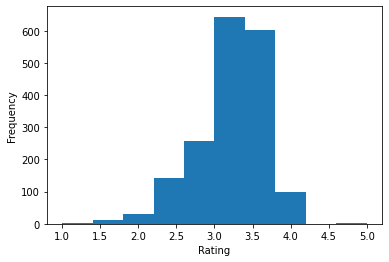

In [32]:
plt.hist(ratings)
plt.ylabel("Frequency")
plt.xlabel("Rating")
plt.show()

### 10 most highly rated chocolate companies

In [34]:
tag_name = soup.select('.Company')

companies = []
for tag in tag_name[1:]:
  companies.append(tag.get_text())

In [37]:
df = pd.DataFrame({"Company": companies, "Rating": ratings})

In [39]:
average_company_rating = df.groupby("Company").Rating.mean().reset_index()

ten_best_rated = average_company_rating.nlargest(10, "Rating")

ten_best_rated.head(10)

,Company,Rating
380,Tobago Estate (Pralus),4.000000
183,Heirloom Cacao Preservation (Zokoko),3.875000
287,Ocelot,3.875000
14,Amedei,3.846154
249,Matale,3.812500
304,Patric,3.791667
191,Idilio (Felchlin),3.775000
2,Acalli,3.750000
82,Chocola'te,3.750000
96,Christopher Morel (Felchlin),3.750000


### Is more cacao better?

In [40]:
cocoa_percents = []
cocoa_percent_tags = soup.select(".CocoaPercent")
 
for td in cocoa_percent_tags[1:]:
  percent = float(td.get_text().strip('%'))
  cocoa_percents.append(percent)

In [42]:
d = {'Ratings': ratings, 'company_name': companies ,'CocoaPercentage': cocoa_percents}

cocoa_df = pd.DataFrame(d)

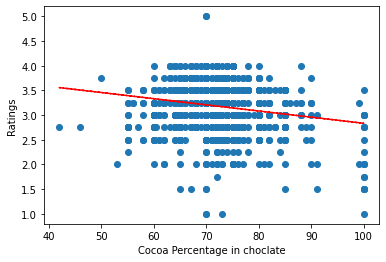

In [43]:
plt.clf()
plt.scatter(cocoa_df.CocoaPercentage, cocoa_df.Ratings)
plt.ylabel("Ratings")
plt.xlabel("Cocoa Percentage in choclate")
z = np.polyfit(cocoa_df.CocoaPercentage, cocoa_df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(cocoa_df.CocoaPercentage, line_function(cocoa_df.CocoaPercentage), "r--")
plt.show()

### Where are the best cocoa beans grown?

In [44]:
origins = []
origin_tags = soup.select(".BroadBeanOrigin")
 
for tag in origin_tags[1:]:
  origins.append(tag.get_text())

In [45]:
d = {'Ratings': ratings ,'BroadBeanOrigin': origins}

origin_df = pd.DataFrame(d)

In [46]:
origin_df.groupby("BroadBeanOrigin").Ratings.mean().reset_index().sort_values(by="Ratings", ascending=False).head(10)

,BroadBeanOrigin,Ratings
32,"Gre., PNG, Haw., Haiti, Mad",4.00
95,"Venezuela, Java",4.00
34,"Guat., D.R., Peru, Mad., PNG",4.00
85,"Ven, Bolivia, D.R.",4.00
18,"Dom. Rep., Madagascar",4.00
59,"Peru, Dom. Rep",4.00
20,"Dominican Rep., Bali",3.75
17,"DR, Ecuador, Peru",3.75
90,"Venez,Africa,Brasil,Peru,Mex",3.75
89,"Ven.,Ecu.,Peru,Nic.",3.75


### Which countries produce the highest-rated bars?

In [47]:
company_locations = []
company_location_tags = soup.select(".CompanyLocation")
 
for tag in company_location_tags[1:]:
  company_locations.append(tag.get_text())

In [49]:
d = {'Ratings': ratings ,'CompanyLocation': company_locations}

location_df = pd.DataFrame(d)

In [54]:
# location_df.groupby("CompanyLocation").Ratings.mean().reset_index().sort_values(by="Ratings", ascending=False).head(10)

location_df.groupby("CompanyLocation").Ratings.mean().reset_index().nlargest(10, "Ratings").head(10)

,CompanyLocation,Ratings
8,Chile,3.750000
0,Amsterdam,3.500000
35,Netherlands,3.500000
40,Philippines,3.500000
25,Iceland,3.416667
58,Vietnam,3.409091
6,Brazil,3.397059
41,Poland,3.375000
2,Australia,3.357143
22,Guatemala,3.350000
